# Modules and functions

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import shutil
import math
import cv2
import csv
import os
%matplotlib inline

def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)

        shutil.rmtree(directory, ignore_errors=True)
        os.makedirs(directory)
    except OSError:
        print('Error: Creating directory. ' + directory)

## Links

### https://stackoverflow.com/questions/10716464/what-are-the-correct-usage-parameter-values-for-houghcircles-in-opencv-for-iris

### https://stackoverflow.com/questions/9860667/writing-robust-color-and-size-invariant-circle-detection-with-opencv-based-on

## HOUGH Detect
### Parameters
- image	8-bit, single-channel, grayscale input image.
- circles	Output vector of found circles. Each vector is encoded as a 3-element floating-point vector (x,y,radius) .
- method	Detection method, see cv::HoughModes. Currently, the only implemented method is HOUGH_GRADIENT
- dp	Inverse ratio of the accumulator resolution to the image resolution. For example, if dp=1 , the accumulator has the same resolution as the input image. If dp=2 , the accumulator has half as big width and height.
- minDist	Minimum distance between the centers of the detected circles. If the parameter is too small, multiple neighbor circles may be falsely detected in addition to a true one. If it is too large, some circles may be missed.
- param1	First method-specific parameter. In case of CV_HOUGH_GRADIENT , it is the higher threshold of the two passed to the Canny edge detector (the lower one is twice smaller).
- param2	Second method-specific parameter. In case of CV_HOUGH_GRADIENT , it is the accumulator threshold for the circle centers at the detection stage. The smaller it is, the more false circles may be detected. Circles, corresponding to the larger accumulator values, will be returned first.
- minRadius	Minimum circle radius.
- maxRadius	Maximum circle radius.

## Get position vertex
### HoughCircles

In [32]:
def drawcircles(circles, src):
    if circles is not None:
        circles = np.uint16(np.around(circles))
        it = 0
        for i in circles[0, :]:
            center = (i[0], i[1])
            # print('center=', center, end=' ')
            # circle center
            cv2.circle(src, center, 1, (0, 100, 100), 3)
            # circle outline
            radius = i[2]
            # print('radius=', radius, end='\n')
            cv2.circle(src, center, radius, (255, 0, 255), 3)
            
            it += 1
        
        return it
    return 0

            
def recognitioncircles(src, name, params):
    # HOUGH DETECT
    # filters
    # GRAY
    gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
    # delete noise
    # gaus = cv2.GaussianBlur(gray, (5, 5), 2)
    # cv.imwrite("gaus.jpg", gaus)

    rows = gray.shape[0]
    h, w = src.shape[:2]

    # const
    par1 = params[0] #90 #90 #80 #40
    par2 = params[1] #70 #68 #50 #67
    minR = 2
    maxR = 63
    
    circles = cv2.HoughCircles(gray, cv.HOUGH_GRADIENT, 2, 2*maxR,
                          param1=par1, param2=par2,
                          minRadius=minR, maxRadius=maxR)
    
    lots = drawcircles(circles, src)
    cv2.imwrite(str(name) + ".jpg", src)
    
    return lots

In [40]:
param = [(90, 90), (90, 70), (90, 68), (80, 50), (40, 67)]

wastefiles = ['.DS_Store', '.ipynb_checkpoints']

Dir = './../data/'
listOfFiles = os.listdir(Dir)
listOfFiles.sort()

image = listOfFiles
image.remove('.DS_Store')
forFileDic = {'image': image}

for i in param:
    pathparam = './../result/HoughCircles/' + str(i) + '/'
    createFolder(pathparam)

    # print(listOfFiles)
        
    houghRecognition = []

    for j in listOfFiles:
        if j not in wastefiles:
            image = str(j)
            img = cv2.imread(Dir + image)
            lots = recognitioncircles(img, pathparam + image, i)
            houghRecognition.append(str(lots))
        
    forFileDic[str(i)] = houghRecognition

print('Done!')

Done!


## Create cvs file

In [41]:
# forFileDic

with open('./../result/HoughCircles.csv', mode='w') as csv_file:
    fieldnames = forFileDic.keys()
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    writer.writeheader()
    
    for i in range(0, len(forFileDic.get('image'))):
        row = {}
        for header in fieldnames:
            el = forFileDic.get(header)   # get list
            row[header] = el[i]
        
        print('Row: ', row)
        writer.writerow(row)

Row:  {'image': '100_4.JPG', '(90, 90)': '2', '(90, 70)': '4', '(90, 68)': '4', '(80, 50)': '4', '(40, 67)': '3'}
Row:  {'image': '101_7.JPG', '(90, 90)': '1', '(90, 70)': '1', '(90, 68)': '1', '(80, 50)': '2', '(40, 67)': '1'}
Row:  {'image': '102_8.JPG', '(90, 90)': '1', '(90, 70)': '1', '(90, 68)': '1', '(80, 50)': '2', '(40, 67)': '2'}
Row:  {'image': '103_8.JPG', '(90, 90)': '1', '(90, 70)': '2', '(90, 68)': '2', '(80, 50)': '5', '(40, 67)': '4'}
Row:  {'image': '104_6.JPG', '(90, 90)': '1', '(90, 70)': '3', '(90, 68)': '3', '(80, 50)': '5', '(40, 67)': '4'}
Row:  {'image': '105_6.JPG', '(90, 90)': '1', '(90, 70)': '2', '(90, 68)': '2', '(80, 50)': '4', '(40, 67)': '4'}
Row:  {'image': '106_6.JPG', '(90, 90)': '2', '(90, 70)': '2', '(90, 68)': '4', '(80, 50)': '5', '(40, 67)': '4'}
Row:  {'image': '107_8.JPG', '(90, 90)': '1', '(90, 70)': '3', '(90, 68)': '3', '(80, 50)': '4', '(40, 67)': '4'}
Row:  {'image': '108_4.JPG', '(90, 90)': '1', '(90, 70)': '4', '(90, 68)': '4', '(80, 50

# Analysis csv file

**Считаем данные из файла в память в виде объекта Pandas.DataFrame**

In [42]:
data = pd.read_csv('./../result/HoughCircles.csv')

**Данные представлены в виде таблицы. Посмотрим на первые 5 строк:**

In [43]:
data.head(5)

,image,"(90, 90)","(90, 70)","(90, 68)","(80, 50)","(40, 67)"
0,100_4.JPG,2,4,4,4,3
1,101_7.JPG,1,1,1,2,1
2,102_8.JPG,1,1,1,2,2
3,103_8.JPG,1,2,2,5,4
4,104_6.JPG,1,3,3,5,4


**Опишем данные**

In [44]:
data.describe()

,"(90, 90)","(90, 70)","(90, 68)","(80, 50)","(40, 67)"
count,413.000000,413.000000,413.000000,413.000000,413.000000
mean,2.220339,2.888620,2.929782,3.474576,3.251816
std,1.650941,1.776926,1.781079,2.206006,2.195434
min,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.000000,2.000000,2.000000,2.000000,2.000000
50%,2.000000,2.000000,2.000000,3.000000,3.000000
75%,3.000000,4.000000,4.000000,5.000000,4.000000
max,11.000000,10.000000,10.000000,22.000000,20.000000


**Сравним их между собой**

<Figure size 5400x3600 with 0 Axes>

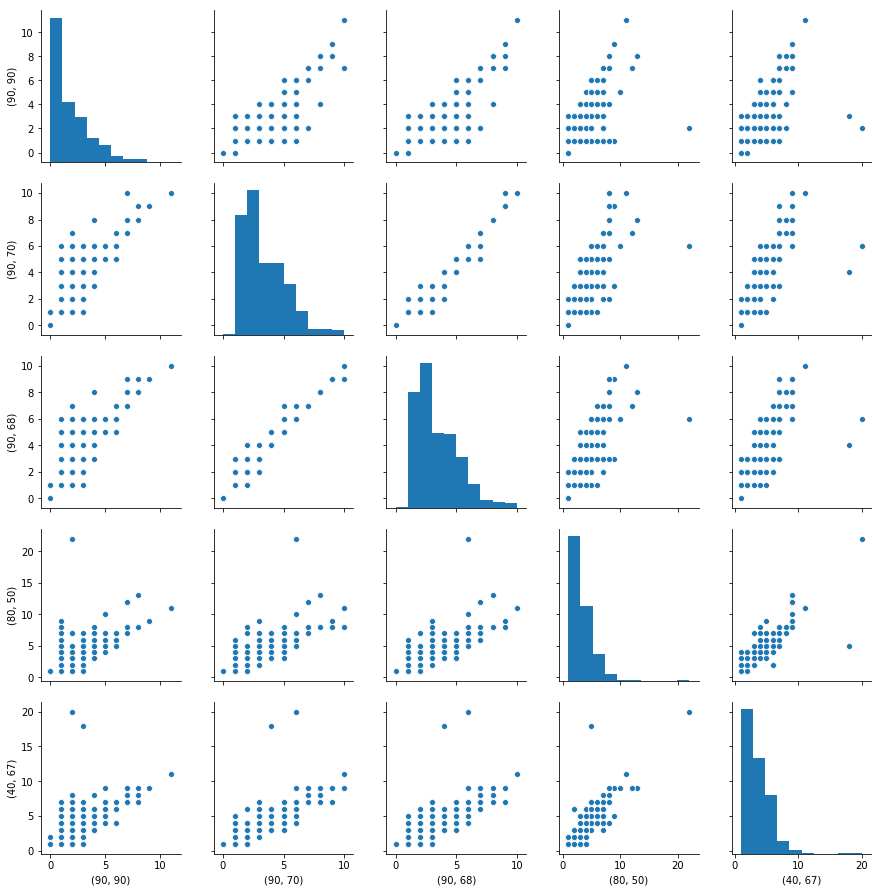

In [45]:
plt.figure(dpi=900)
sns.pairplot(data)
plt.savefig("./../result/HoughCircles/pairplot(data).jpg")

**Проанализируем каждый стоолбец отдельно**

<Figure size 5400x3600 with 0 Axes>

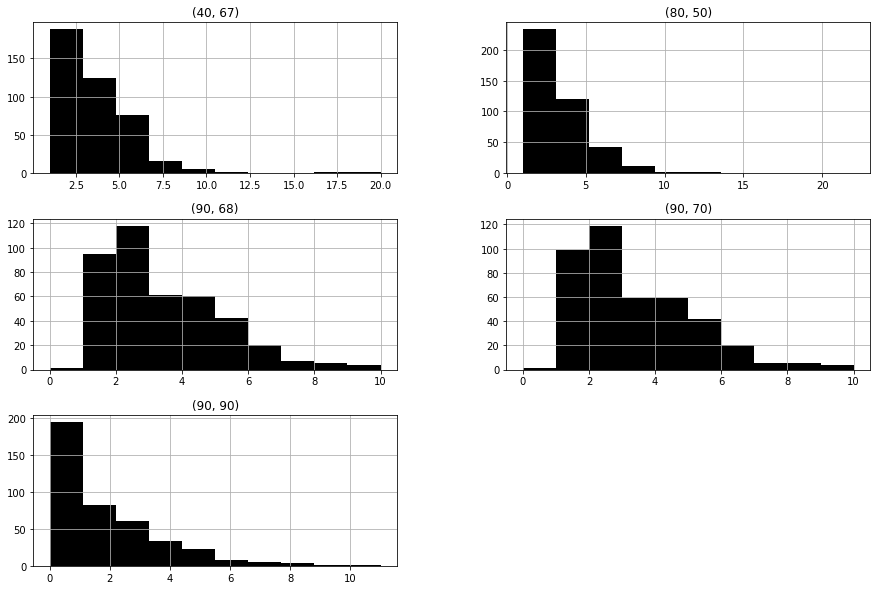

In [46]:
dt = data
plt.figure(dpi=900)
dt.hist(color = 'k', figsize=(15,10))
plt.show()

# The best Hough

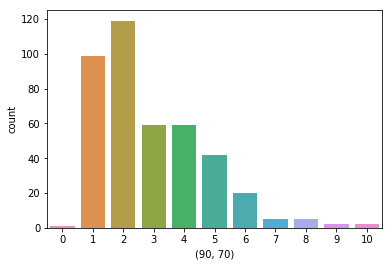

In [50]:
sns.countplot(data['(90, 70)'])

In [48]:
head = ['(90, 90)', '(90, 70)', '(90, 68)', '(80, 50)', '(40, 67)']

zero = []

for j in range(0, len(head)):
    sumZero = 0
    for i in data[head[j]]:
        if i == 0:
            sumZero += 1
    
    zero.append(sumZero)

print(zero)

[7, 1, 1, 0, 0]


## MSER Blob Detector
### 1

In [67]:
def supress(x, fs):
    for f in fs:
        distx = f.pt[0] - x.pt[0]
        disty = f.pt[1] - x.pt[1]
        dist = math.sqrt(distx*distx + disty*disty)
        if (f.size > x.size) and (dist<f.size/2):
            return True

def mser(src_img, name):
    orig = cv2.imread(src_img)
    img = orig.copy()
    img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # kernel = np.ones((5,5), np.uint8)
    # img2 = cv2.erode(img2, kernel, iterations = 1)
    # img2 = cv2.GaussianBlur(img2,(5,5),2)
    img2 = cv2.Canny(img2, 100, 255)

    detector = cv2.MSER_create()
    fs = detector.detect(img2)
    fs.sort(key = lambda x: -x.size)

    sfs = [x for x in fs if not supress(x, fs)]

    for f in sfs:
            cv2.circle(img, (int(f.pt[0]), int(f.pt[1])), int(f.size/2), (150, 55, 65), 2, cv2.LINE_AA)
            cv2.circle(img, (int(f.pt[0]), int(f.pt[1])), int(f.size/2), (250, 200, 200), 1, cv2.LINE_AA)

    h, w = orig.shape[:2]
    vis = np.zeros((h, w*2+5), np.uint8)
    vis = cv2.cvtColor(vis, cv2.COLOR_GRAY2BGR)
    vis[:h, :w] = orig
    vis[:h, w+5:w*2+5] = img

    # cv2.imshow("image", vis)
    cv2.imwrite(str(name) + ".jpg", vis)
    
    return len(sfs)
#     cv2.waitKey()
#     cv2.destroyAllWindows()

In [68]:
wastefiles = ['.DS_Store', '.ipynb_checkpoints']

Dir = './../data/'
listOfFiles = os.listdir(Dir)
listOfFiles.sort()

image = listOfFiles
image.remove('.DS_Store')
forFileDic = {'image': image}

path = './../result/mser/'
createFolder(path)
    
mserRecognition = []

for j in listOfFiles:
    if j not in wastefiles:
        image = str(j)
#         img = cv2.imread(Dir + image)
        lots = mser(Dir + image, path + image)
#         print(lots)
        mserRecognition.append(str(lots))
        
forFileDic['Mser'] = mserRecognition

print('Done!')

Done!


## Create cvs file

In [69]:
# forFileDic

with open('./../result/Mser.csv', mode='w') as csv_file:
    fieldnames = forFileDic.keys()
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    writer.writeheader()
    
    for i in range(0, len(forFileDic.get('image'))):
        row = {}
        for header in fieldnames:
            el = forFileDic.get(header)   # get list
            row[header] = el[i]
        
        print('Row: ', row)
        writer.writerow(row)

Row:  {'image': '100_4.JPG', 'Mser': '5'}
Row:  {'image': '101_7.JPG', 'Mser': '6'}
Row:  {'image': '102_8.JPG', 'Mser': '8'}
Row:  {'image': '103_8.JPG', 'Mser': '3'}
Row:  {'image': '104_6.JPG', 'Mser': '2'}
Row:  {'image': '105_6.JPG', 'Mser': '2'}
Row:  {'image': '106_6.JPG', 'Mser': '7'}
Row:  {'image': '107_8.JPG', 'Mser': '13'}
Row:  {'image': '108_4.JPG', 'Mser': '6'}
Row:  {'image': '109_4.JPG', 'Mser': '5'}
Row:  {'image': '10_2.JPG', 'Mser': '3'}
Row:  {'image': '110_4.JPG', 'Mser': '5'}
Row:  {'image': '111_2.JPG', 'Mser': '2'}
Row:  {'image': '112_4.JPG', 'Mser': '3'}
Row:  {'image': '113_4.JPG', 'Mser': '0'}
Row:  {'image': '114_5.JPG', 'Mser': '1'}
Row:  {'image': '115_5.JPG', 'Mser': '0'}
Row:  {'image': '116_5.JPG', 'Mser': '0'}
Row:  {'image': '117_5.JPG', 'Mser': '0'}
Row:  {'image': '118_4.JPG', 'Mser': '0'}
Row:  {'image': '119_4.JPG', 'Mser': '4'}
Row:  {'image': '11_2.JPG', 'Mser': '2'}
Row:  {'image': '120_6.JPG', 'Mser': '5'}
Row:  {'image': '121_4.JPG', 'Mser'

# Analysis csv file

**Считаем данные из файла в память в виде объекта Pandas.DataFrame**

In [70]:
data = pd.read_csv('./../result/Mser.csv')

**Данные представлены в виде таблицы. Посмотрим на первые 5 строк:**

In [71]:
data.head(5)

,image,Mser
0,100_4.JPG,5
1,101_7.JPG,6
2,102_8.JPG,8
3,103_8.JPG,3
4,104_6.JPG,2


**Опишем данные**

In [72]:
data.describe()

,Mser
count,413.000000
mean,8.116223
std,8.309315
min,0.000000
25%,3.000000
50%,6.000000
75%,10.000000
max,89.000000


**Сравним их между собой**

<Figure size 5400x3600 with 0 Axes>

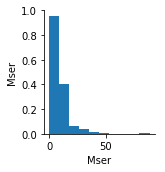

In [73]:
plt.figure(dpi=900)
sns.pairplot(data)
plt.savefig("./../result/pairplot(data)_MSER.jpg")

**Проанализируем каждый стоолбец отдельно**

<Figure size 5400x3600 with 0 Axes>

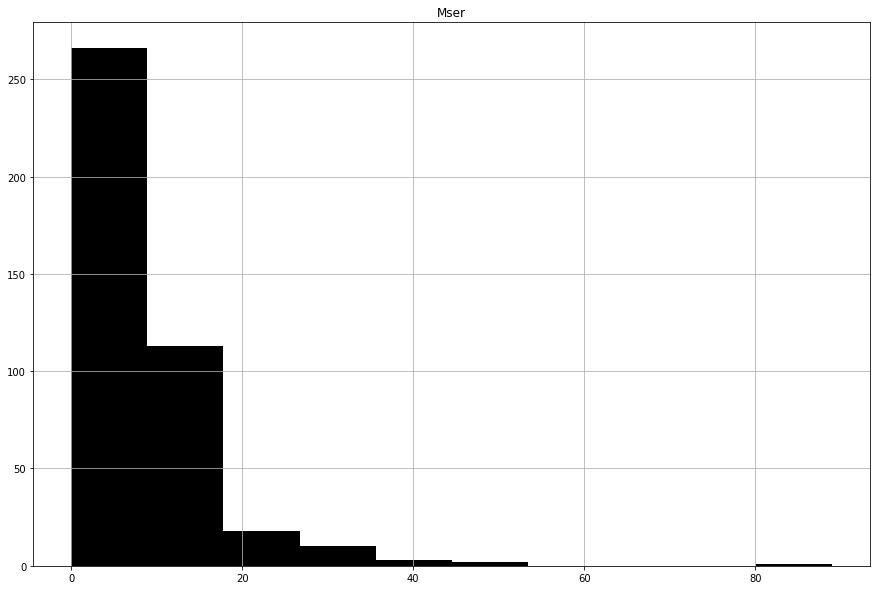

In [74]:
dt = data
plt.figure(dpi=900)
dt.hist(color = 'k', figsize=(15,10))
plt.show()

### 2 http://qaru.site/questions/1242600/why-houghcircles-returns-0-circles-while-trying-to-detect-irises

In [80]:
import cv2
import math
import numpy as np
import sys

def non_maximal_supression(x, features):
    for f in features:
        distx = f.pt[0] - x.pt[0]
        disty = f.pt[1] - x.pt[1]
        dist = math.sqrt(distx*distx + disty*disty)
        if (f.size > x.size) and (dist<f.size/2):
            return True

def mser2(src_image, name):
    thresh = 70
    img = cv2.imread(src_image)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #erosion = cv2.GaussianBlur(bw, (5, 5), 2)
    bw = cv2.Canny(gray, 100, 255)
    # erosion = cv2.medianBlur(bw, 5)
    # kernel = np.ones((5,5), np.uint8)
    # bw = cv2.erode(erosion, kernel, iterations = 2)

    detector = cv2.MSER_create()
    features = detector.detect(bw)
    # coordinates, bboxes = detector.detectRegions(gray)

    features.sort(key = lambda x: -x.size)

    features = [ x for x in features if (x.size > 40)] 
    reduced_features = [x for x in features if not non_maximal_supression(x, features)]

    for rf in reduced_features:
        cv2.circle(img, (int(rf.pt[0]), int(rf.pt[1])), int(rf.size/2), (0,0,255), 3)

    # cv2.imshow("iris detection", img)
    cv2.imwrite(str(name) + ".jpg", img)
    
    return len(reduced_features)
    # cv2.waitKey()

In [81]:
wastefiles = ['.DS_Store', '.ipynb_checkpoints']

Dir = './../data/'
listOfFiles = os.listdir(Dir)
listOfFiles.sort()

image = listOfFiles
image.remove('.DS_Store')
forFileDic = {'image': image}

path = './../result/mser2/'
createFolder(path)
    
mserRecognition = []

for j in listOfFiles:
    if j not in wastefiles:
        image = str(j)
#         img = cv2.imread(Dir + image)
        lots = mser2(Dir + image, path + image)
#         print(lots)
        mserRecognition.append(str(lots))
        
forFileDic['Mser'] = mserRecognition

print('Done!')

Done!


## Create cvs file

In [82]:
# forFileDic

with open('./../result/Mser2.csv', mode='w') as csv_file:
    fieldnames = forFileDic.keys()
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    writer.writeheader()
    
    for i in range(0, len(forFileDic.get('image'))):
        row = {}
        for header in fieldnames:
            el = forFileDic.get(header)   # get list
            row[header] = el[i]
        
        print('Row: ', row)
        writer.writerow(row)

Row:  {'image': '100_4.JPG', 'Mser': '4'}
Row:  {'image': '101_7.JPG', 'Mser': '0'}
Row:  {'image': '102_8.JPG', 'Mser': '0'}
Row:  {'image': '103_8.JPG', 'Mser': '0'}
Row:  {'image': '104_6.JPG', 'Mser': '1'}
Row:  {'image': '105_6.JPG', 'Mser': '0'}
Row:  {'image': '106_6.JPG', 'Mser': '2'}
Row:  {'image': '107_8.JPG', 'Mser': '0'}
Row:  {'image': '108_4.JPG', 'Mser': '2'}
Row:  {'image': '109_4.JPG', 'Mser': '1'}
Row:  {'image': '10_2.JPG', 'Mser': '1'}
Row:  {'image': '110_4.JPG', 'Mser': '3'}
Row:  {'image': '111_2.JPG', 'Mser': '1'}
Row:  {'image': '112_4.JPG', 'Mser': '2'}
Row:  {'image': '113_4.JPG', 'Mser': '0'}
Row:  {'image': '114_5.JPG', 'Mser': '0'}
Row:  {'image': '115_5.JPG', 'Mser': '0'}
Row:  {'image': '116_5.JPG', 'Mser': '0'}
Row:  {'image': '117_5.JPG', 'Mser': '0'}
Row:  {'image': '118_4.JPG', 'Mser': '0'}
Row:  {'image': '119_4.JPG', 'Mser': '0'}
Row:  {'image': '11_2.JPG', 'Mser': '2'}
Row:  {'image': '120_6.JPG', 'Mser': '0'}
Row:  {'image': '121_4.JPG', 'Mser':

# Analysis csv file

**Считаем данные из файла в память в виде объекта Pandas.DataFrame**

In [83]:
data = pd.read_csv('./../result/Mser2.csv')

**Данные представлены в виде таблицы. Посмотрим на первые 5 строк:**

In [84]:
data.head(5)

,image,Mser
0,100_4.JPG,4
1,101_7.JPG,0
2,102_8.JPG,0
3,103_8.JPG,0
4,104_6.JPG,1


**Опишем данные**

In [85]:
data.describe()

,Mser
count,413.000000
mean,2.510896
std,3.286927
min,0.000000
25%,0.000000
50%,1.000000
75%,3.000000
max,23.000000


**Сравним их между собой**

<Figure size 5400x3600 with 0 Axes>

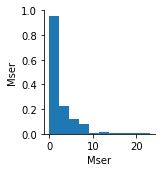

In [86]:
plt.figure(dpi=900)
sns.pairplot(data)
plt.savefig("./../result/pairplot(data)_MSER2.jpg")

**Проанализируем каждый стоолбец отдельно**

<Figure size 5400x3600 with 0 Axes>

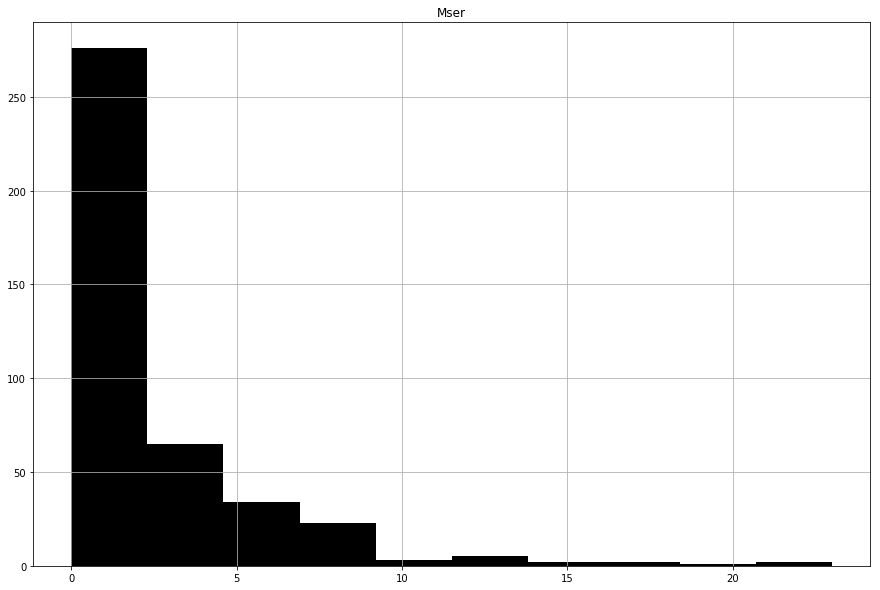

In [87]:
dt = data
plt.figure(dpi=900)
dt.hist(color = 'k', figsize=(15,10))
plt.show()

## Find the Center of a Blob (Centroid) using OpenCV
### https://www.learnopencv.com/find-center-of-blob-centroid-using-opencv-cpp-python/

In [ ]:
import cv2
import math
import numpy as np

# read image
img = cv2.imread("58.jpg")
 
# convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_image = cv2.Canny(gray, 100, 255)
# cv2.imshow('Canny',gray_image)
 
# convert the grayscale image to binary image
ret,thresh = cv2.threshold(gray_image,127,255,0)
# cv2.imshow("thresh", thresh)
 
# find contours in the binary image
im2, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cv2.imshow("im2", im2)

for c in contours:
   # calculate moments for each contour
    M = cv2.moments(c)
 
   # calculate x,y coordinate of center
    cX = 0
    cY = 0
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
    
    cv2.circle(img, (cX, cY), 5, (255, 255, 255), -1)
#         cv2.putText(img, "c", (cX - 25, cY - 25),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
 
# display the image
cv2.imshow("Image", img)
cv2.waitKey(0)

## Simple blob detector
### http://qaru.site/questions/180029/how-to-use-opencv-simpleblobdetector
### https://www.learnopencv.com/blob-detection-using-opencv-python-c/

In [92]:
def simpleblob(src_img, name):
    # Read image
    img = cv2.imread(src_img)
    im = img.copy()

    # Setup SimpleBlobDetector parameters.
    params = cv2.SimpleBlobDetector_Params()

    # Change thresholds
    params.minThreshold = 10
    params.maxThreshold = 200

    # Filter by Area.
    params.filterByArea = True
    params.minArea = 1500

    # Filter by Circularity
    params.filterByCircularity = True
    params.minCircularity = 0.01

    # Filter by Convexity
    params.filterByConvexity = True
    params.minConvexity = 0.81

    # Filter by Inertia
    params.filterByInertia = True
    params.minInertiaRatio = 0.01

    # Create a detector with the parameters
    detector = cv2.SimpleBlobDetector_create(params)

    # filters
    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    im = cv2.Canny(gray, 100, 255)

    # Detect blobs.
    keypoints = detector.detect(im)

    # Draw detected blobs as red circles.
    # cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures
    # the size of the circle corresponds to the size of blob

    im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    # Show blobs
#     cv2.imshow("Keypoints.jpg", im_with_keypoints)
#     cv2.waitKey(0)

    cv2.imwrite(str(name) + ".jpg", im_with_keypoints)
    
    return len(keypoints)

In [93]:
wastefiles = ['.DS_Store', '.ipynb_checkpoints']

Dir = './../data/'
listOfFiles = os.listdir(Dir)
listOfFiles.sort()

image = listOfFiles
image.remove('.DS_Store')
forFileDic = {'image': image}

path = './../result/simple_blob_detector/'
createFolder(path)
    
blobRecognition = []

for j in listOfFiles:
    if j not in wastefiles:
        image = str(j)
#         img = cv2.imread(Dir + image)
        lots = simpleblob(Dir + image, path + image)
#         print(lots)
        blobRecognition.append(str(lots))
        
forFileDic['Blob'] = blobRecognition

print('Done!')

Done!


## Create cvs file

In [94]:
# forFileDic

with open('./../result/simple_blob_detector.csv', mode='w') as csv_file:
    fieldnames = forFileDic.keys()
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    writer.writeheader()
    
    for i in range(0, len(forFileDic.get('image'))):
        row = {}
        for header in fieldnames:
            el = forFileDic.get(header)   # get list
            row[header] = el[i]
        
        print('Row: ', row)
        writer.writerow(row)

Row:  {'image': '100_4.JPG', 'Blob': '2'}
Row:  {'image': '101_7.JPG', 'Blob': '0'}
Row:  {'image': '102_8.JPG', 'Blob': '0'}
Row:  {'image': '103_8.JPG', 'Blob': '0'}
Row:  {'image': '104_6.JPG', 'Blob': '0'}
Row:  {'image': '105_6.JPG', 'Blob': '0'}
Row:  {'image': '106_6.JPG', 'Blob': '1'}
Row:  {'image': '107_8.JPG', 'Blob': '0'}
Row:  {'image': '108_4.JPG', 'Blob': '1'}
Row:  {'image': '109_4.JPG', 'Blob': '0'}
Row:  {'image': '10_2.JPG', 'Blob': '0'}
Row:  {'image': '110_4.JPG', 'Blob': '1'}
Row:  {'image': '111_2.JPG', 'Blob': '0'}
Row:  {'image': '112_4.JPG', 'Blob': '0'}
Row:  {'image': '113_4.JPG', 'Blob': '0'}
Row:  {'image': '114_5.JPG', 'Blob': '0'}
Row:  {'image': '115_5.JPG', 'Blob': '0'}
Row:  {'image': '116_5.JPG', 'Blob': '0'}
Row:  {'image': '117_5.JPG', 'Blob': '0'}
Row:  {'image': '118_4.JPG', 'Blob': '0'}
Row:  {'image': '119_4.JPG', 'Blob': '0'}
Row:  {'image': '11_2.JPG', 'Blob': '0'}
Row:  {'image': '120_6.JPG', 'Blob': '0'}
Row:  {'image': '121_4.JPG', 'Blob':

# Analysis csv file

**Считаем данные из файла в память в виде объекта Pandas.DataFrame**

In [95]:
data = pd.read_csv('./../result/simple_blob_detector.csv')

**Данные представлены в виде таблицы. Посмотрим на первые 5 строк:**

In [96]:
data.head(5)

,image,Blob
0,100_4.JPG,2
1,101_7.JPG,0
2,102_8.JPG,0
3,103_8.JPG,0
4,104_6.JPG,0


**Опишем данные**

In [97]:
data.describe()

,Blob
count,413.000000
mean,1.322034
std,2.460449
min,0.000000
25%,0.000000
50%,0.000000
75%,2.000000
max,31.000000


**Сравним их между собой**

<Figure size 5400x3600 with 0 Axes>

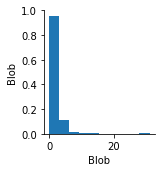

In [98]:
plt.figure(dpi=900)
sns.pairplot(data)
plt.savefig("./../result/pairplot(data)_simple_blob_detector.jpg")

**Проанализируем каждый стоолбец отдельно**

<Figure size 5400x3600 with 0 Axes>

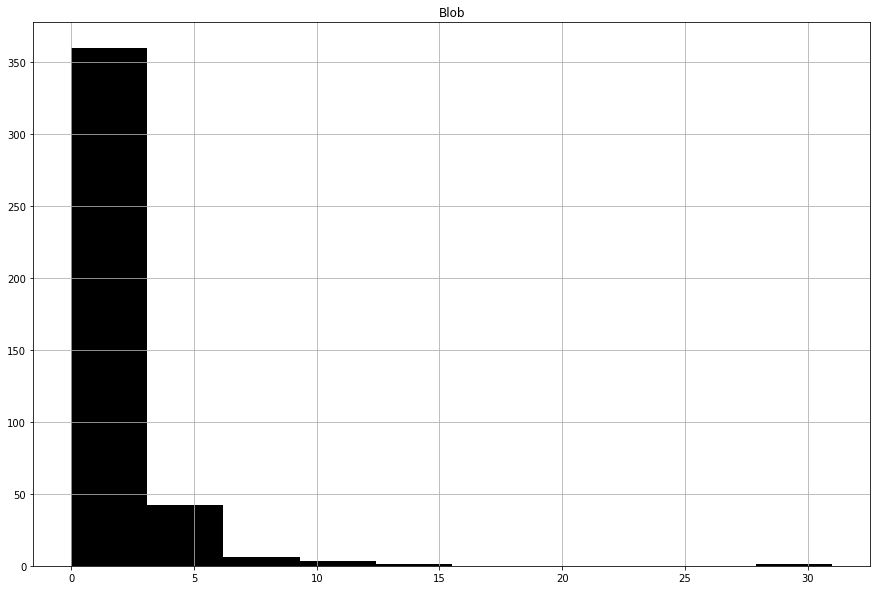

In [99]:
dt = data
plt.figure(dpi=900)
dt.hist(color = 'k', figsize=(15,10))
plt.show()

In [101]:
def simple_blob_detector2(src_img, name):
    # Read image
    im = cv2.imread(src_img)

    detector = cv2.SimpleBlobDetector_create()

    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    # kernel = np.ones((5,5), np.uint8)
    # erosion = cv2.erode(gray, kernel, iterations = 1)
    #thresh = cv2.GaussianBlur(gray, (5, 5), 2)
    im = cv2.Canny(gray, 100, 255)

    # Detect blobs.
    keypoints = detector.detect(im)

    # Draw detected blobs as red circles.
    # cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures
    # the size of the circle corresponds to the size of blob

    im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

#     # Show blobs
#     cv2.imshow("Keypoints", im_with_keypoints)
#     cv2.waitKey(0)
    
    cv2.imwrite(str(name) + ".jpg", im_with_keypoints)
    
    return len(keypoints)

In [102]:
wastefiles = ['.DS_Store', '.ipynb_checkpoints']

Dir = './../data/'
listOfFiles = os.listdir(Dir)
listOfFiles.sort()

image = listOfFiles
image.remove('.DS_Store')
forFileDic = {'image': image}

path = './../result/simple_blob_detector2/'
createFolder(path)
    
blobRecognition = []

for j in listOfFiles:
    if j not in wastefiles:
        image = str(j)
#         img = cv2.imread(Dir + image)
        lots = simple_blob_detector2(Dir + image, path + image)
#         print(lots)
        blobRecognition.append(str(lots))
        
forFileDic['Blob'] = blobRecognition

print('Done!')

Done!


## Create cvs file

In [103]:
# forFileDic

with open('./../result/simple_blob_detector2.csv', mode='w') as csv_file:
    fieldnames = forFileDic.keys()
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    writer.writeheader()
    
    for i in range(0, len(forFileDic.get('image'))):
        row = {}
        for header in fieldnames:
            el = forFileDic.get(header)   # get list
            row[header] = el[i]
        
        print('Row: ', row)
        writer.writerow(row)

Row:  {'image': '100_4.JPG', 'Blob': '2'}
Row:  {'image': '101_7.JPG', 'Blob': '0'}
Row:  {'image': '102_8.JPG', 'Blob': '3'}
Row:  {'image': '103_8.JPG', 'Blob': '1'}
Row:  {'image': '104_6.JPG', 'Blob': '1'}
Row:  {'image': '105_6.JPG', 'Blob': '1'}
Row:  {'image': '106_6.JPG', 'Blob': '2'}
Row:  {'image': '107_8.JPG', 'Blob': '0'}
Row:  {'image': '108_4.JPG', 'Blob': '1'}
Row:  {'image': '109_4.JPG', 'Blob': '3'}
Row:  {'image': '10_2.JPG', 'Blob': '0'}
Row:  {'image': '110_4.JPG', 'Blob': '1'}
Row:  {'image': '111_2.JPG', 'Blob': '0'}
Row:  {'image': '112_4.JPG', 'Blob': '1'}
Row:  {'image': '113_4.JPG', 'Blob': '0'}
Row:  {'image': '114_5.JPG', 'Blob': '1'}
Row:  {'image': '115_5.JPG', 'Blob': '0'}
Row:  {'image': '116_5.JPG', 'Blob': '0'}
Row:  {'image': '117_5.JPG', 'Blob': '0'}
Row:  {'image': '118_4.JPG', 'Blob': '0'}
Row:  {'image': '119_4.JPG', 'Blob': '0'}
Row:  {'image': '11_2.JPG', 'Blob': '0'}
Row:  {'image': '120_6.JPG', 'Blob': '4'}
Row:  {'image': '121_4.JPG', 'Blob':

# Analysis csv file

**Считаем данные из файла в память в виде объекта Pandas.DataFrame**

In [104]:
data = pd.read_csv('./../result/simple_blob_detector2.csv')

**Данные представлены в виде таблицы. Посмотрим на первые 5 строк:**

In [105]:
data.head(5)

,image,Blob
0,100_4.JPG,2
1,101_7.JPG,0
2,102_8.JPG,3
3,103_8.JPG,1
4,104_6.JPG,1


**Опишем данные**

In [106]:
data.describe()

,Blob
count,413.000000
mean,3.779661
std,5.876345
min,0.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,100.000000


**Сравним их между собой**

<Figure size 5400x3600 with 0 Axes>

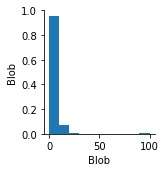

In [107]:
plt.figure(dpi=900)
sns.pairplot(data)
plt.savefig("./../result/pairplot(data)_simple_blob_detector2.jpg")

**Проанализируем каждый стоолбец отдельно**

<Figure size 5400x3600 with 0 Axes>

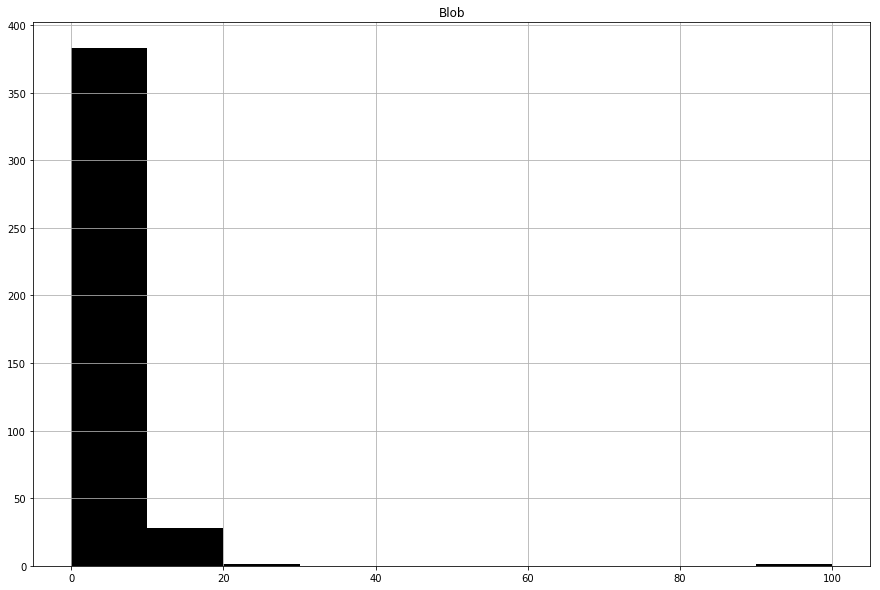

In [108]:
dt = data
plt.figure(dpi=900)
dt.hist(color = 'k', figsize=(15,10))
plt.show()